## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
df_temp = pd.read_excel('consumer creditworthiness test data.xlsx')
def build_df(prediction):
    ds = pd.DataFrame(prediction)
    ds.columns = ['Predicted_Loan_Status']
    df_excel = pd.concat([df_temp,ds],axis=1)
    return df_excel

## Data dictionary

In [3]:
# Loan_ID: Unique Loan ID issued on every loan for a applicant, dtype: Object.
# Gender: Gender of a applicant whether male or female, dtype: string.
# Married: Martial status of a applicant i.e., Yes for married and NO for single, dtype: string.
# Dependents: Number of individuals who are financially dependent on applicant, dtype: integer.
# Education: Highest Education of applicant i.e, Bachelor, Post Graduation etc, dtype: string.
# Self_employed: Whether the applicant is self employed or not i.e, Yes for self employed or else NO, dtype: string.
# ApplicantIncome: Income of the applicant, dtype: integer.
# CoApplicantIncome: Applicant have to put one nominee name that is called CoApplicant. So, it is column releated to coapplicant income, dtype: Integer.
# Loan Amount: Amount of loan applicant wants to issue from the bank.
# Loan_Amount_Term: The amount of time the lender gives you to repay your whole loan, dtype: float.
# Credit_History: It tells about the credit done in the past by the applicant, dtype: Integer.
# Property_Area: This tells about the applicant property is in which area i.e., Rural or Urban, dtype: String.
# Loan_status: It is a target variable column which tells about whether the applicant application for loan approval is passed or not, dtype: String.


## Load dataset

In [4]:
df_orig = pd.read_excel('Consumer creditworthiness train data.xlsx')

## Copy original dataframe to make a working copy

In [5]:
df = df_orig.copy()

## View dataset characteristics and data values


In [6]:
#No. of rows and columns
df_orig.shape

(521, 13)

In [7]:
#View the data
df_orig.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [8]:
#Check datatypes of data
df_orig.dtypes

Loan_ID                int64
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Warnings suspension

In [9]:
warnings.filterwarnings('ignore')

In [10]:
#Any row having missing Loan_ID
df_orig['Loan_ID'].isnull().sum()

0

## Columns having null values and not having null values

In [11]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


In [12]:
#Count of null values for each column
df.isna().sum().sort_values(ascending=False)

Credit_History       43
Self_Employed        27
Loan_Amount_Term     14
Dependents           13
Gender               10
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Property_Area         0
Loan_Status           0
dtype: int64


# Not having null values
- Loan_ID
- Education
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Property_Area
- Loan_Status

# Having null values
- Gender
- Married
- Dependents
- Self_Employed
- Loan_Amount_Term
- Credit_History


In [13]:
df['Credit_History'].value_counts()

1.0    405
0.0     73
Name: Credit_History, dtype: int64

In [14]:
df['Loan_Amount_Term'].value_counts()

360.0    432
180.0     36
480.0     14
300.0     13
240.0      3
120.0      3
84.0       2
60.0       2
12.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64

## Treat Null values

In [15]:
## Treat Null values
#Even though it is float type. It has only 2 values.
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True) 
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
#Mean value is a float value which cannot be true for Loan Term. If we check mode value, it is 360. 
#We can either use mode value to replace null values or median value as it is a float datatype.
df['Loan_Amount_Term'].fillna(np.nanmedian(df['Loan_Amount_Term']),inplace=True) 
#categorical feature. Using mode value to replace null values
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [16]:
#After treating null values for each column
df.isna().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
#Count distinct values for Loan Status
df['Loan_Status'].value_counts()

Y    358
N    163
Name: Loan_Status, dtype: int64

## Label Target feature(Loan_Status) as 1/0 in working copy dataframe

In [18]:
df['Loan_Status'] = np.where(df['Loan_Status']=="Y",1,0)

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,1
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,0
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,1
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,1
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,1


In [20]:
#Split Independent and Dependent(Target) features into different dataframe
Y = df[['Loan_Status']]
X = df.drop(['Loan_Status'],axis=1)

## Splitting numerical and categorical features for ease of analysis


In [21]:
num = X.select_dtypes(include='number')
char = X.select_dtypes(include='object')

In [22]:
#Drop Loan_ID feature as it has no impact on target feature
num.drop('Loan_ID',axis=1,inplace=True)

In [23]:
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1316025,0.0,250000,360.0,1.0
1,1031175,339300.0,256000,360.0,1.0
2,675000,0.0,132000,360.0,1.0
3,581175,530550.0,240000,360.0,1.0
4,1350000,0.0,282000,360.0,1.0


In [24]:
char.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


## Outliers analysis

In [25]:
# Check various percentiles for numerical features. 
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,85%,90%,95%,99%,max
ApplicantIncome,521.0,1.229406e+06,1.449755e+06,33750.0,242955.0,429075.0,497925.0,646875.0,858150.0,1292850.0,1705050.0,2138400.0,3281175.0,8312490.0,18225000.0
CoapplicantIncome,521.0,3.495994e+05,4.824296e+05,0.0,0.0,0.0,0.0,0.0,281250.0,517950.0,708750.0,856350.0,1125000.0,1864710.0,4500000.0
LoanAmount,521.0,2.797044e+05,1.712505e+05,0.0,0.0,88000.0,132000.0,196000.0,250000.0,320000.0,374000.0,450000.0,572000.0,988000.0,1400000.0
Loan_Amount_Term,521.0,3.437159e+02,6.280430e+01,12.0,91.2,180.0,300.0,360.0,360.0,360.0,360.0,360.0,360.0,480.0,480.0
Credit_History,521.0,8.598848e-01,3.474401e-01,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [26]:
# Every numerical feature is highly skewed. Last 2 features are negatively skewed.
num.skew()

ApplicantIncome      6.480148
CoapplicantIncome    3.407483
LoanAmount           2.485041
Loan_Amount_Term    -2.376678
Credit_History      -2.079620
dtype: float64

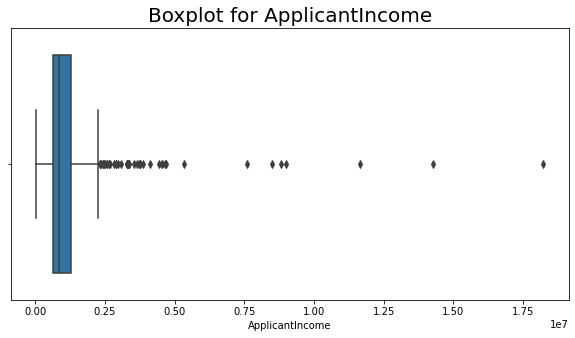

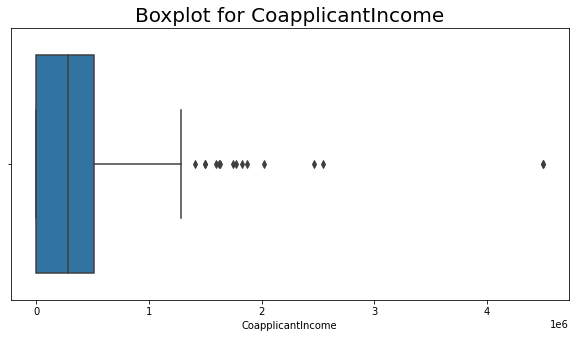

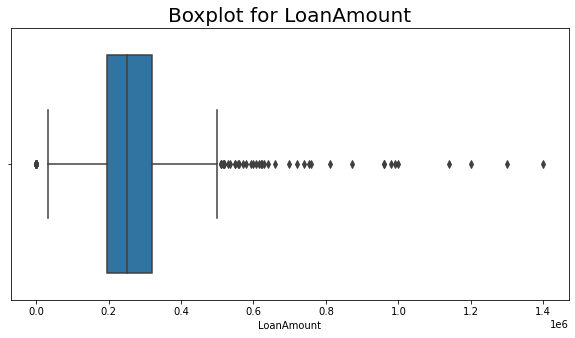

In [27]:
for col in num.columns:
    if col not in("Loan_Amount_Term","Credit_History"):
        plt.figure(figsize=(10,5)) #X-axis, Y-axis
        plt.title('Boxplot for'+" "+col, fontsize=20)
        sns.boxplot(df[col])
        plt.show() 

#### Box plot indicate outliers but as data is skewed, it is normal to give such indication.
- Considering the business case, Applicant Income, Co-applicant Income could be huge for senior executives like CEO etc. so It cannot be considered as outliers. 
- Similarly, loan amount can be very large for some customers depending on their need which cannot be considered as outlier.
- As some features figures are very large and data is highly skewed, we will take log of these features to make it more normally distributed. It will be better for the model.

## Feature Scaling
We will determine it when we will go for modelling. Mainly needed for distance based algorithm.

## Feature engineering - Derived Features/New Features

### New features
- Total Income
- EMI
- salaried
- Balance income (After paying OFF EMI)

In [28]:
#Total income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [29]:
#EMI
#Function to calculate EMI
#Assumption : 9% interest rate
def emi(p, r, t): 
    # for one month interest
    r = r/(12*100)  
    t = t 
    emi = (p*r*pow(1+r,t))/(pow(1+r,t)-1) 
    return emi 
df['EMI'] = emi(df['LoanAmount'], 9,df['Loan_Amount_Term'] )

In [30]:
#Balance Income
df['BalanceIncome'] = df['TotalIncome'] - df['EMI']

In [31]:
#Salaried
df['salaried'] = np.where((df['Education'] == "Graduate") & (df['Self_Employed'] == "No"),"Yes","No")

# Hypothesis Testing for new numerical features (ANOVA test)
## Null hypothesis : 
- New Independent feature have no impact on Target variable

## Alternate hypothesis : 
- New Independent feature have impact on Target variable

In [32]:
stats, p_total_income = f_oneway(df['TotalIncome'],df['Loan_Status'])
stats, p_EMI = f_oneway(df['EMI'],df['Loan_Status'])
stats, p_balance_income = f_oneway(df['BalanceIncome'],df['Loan_Status'])

In [33]:
print("p-value for TotalIncome:",p_total_income)
print("p-value for EMI:", p_EMI)
print("p-value for BalanceIncome:", p_balance_income)

p-value for TotalIncome: 1.4264857706998352e-104
p-value for EMI: 5.925021933671283e-159
p-value for BalanceIncome: 1.9963205272515717e-104


## Outcome of hypothesis testing for numerical features
- p-value in case of TotalIncome, EMI, BalanceIncome is < 5%. It means we reject null hypothesis.
    - These features have impact on target variable. So we will use them.

Text(0, 0.5, 'Percentage')

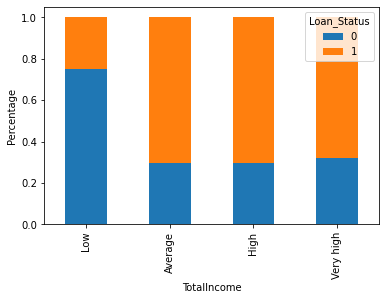

In [34]:
#Visual validation of hypothesis testing
bins=[0,500000,1000000,1500000,2000000] 
group=['Low','Average','High', 'Very high'] 
df['TotalIncome_bin']=pd.cut(df['TotalIncome'],bins,labels=group)
TotalIncome_bin = pd.crosstab(df['TotalIncome_bin'],df['Loan_Status']) 
TotalIncome_bin.div(TotalIncome_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('TotalIncome') 
plt.ylabel('Percentage')

### When total income is low, loan approval is No(0) and and for avg,high and very high incomes, loan approval is Yes (1)

Text(0, 0.5, 'Percentage')

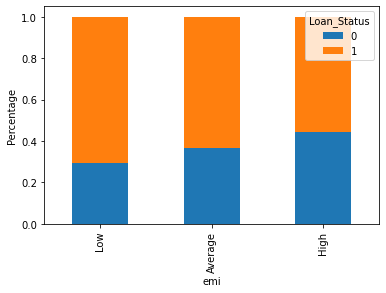

In [35]:
#Visual validation of hypothesis testing
bins=[0,3000,6000,9000] 
group=['Low','Average','High'] 
df['EMI_bin']=pd.cut(df['EMI'],bins,labels=group)
emi_bin = pd.crosstab(df['EMI_bin'],df['Loan_Status']) 
emi_bin.div(emi_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('emi') 
plt.ylabel('Percentage')

## When EMI is low, Loan approval is higher and when it is high, loan approval is low

Text(0, 0.5, 'Percentage')

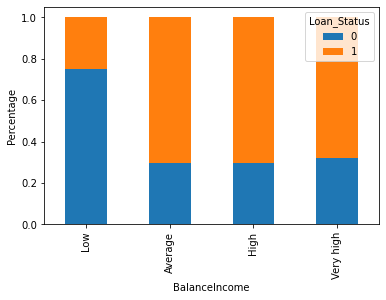

In [36]:
#Visual validation of hypothesis testing
bins=[0,500000,1000000,1500000,2000000] 
group=['Low','Average','High', 'Very high'] 
df['BalanceIncome_bin']=pd.cut(df['BalanceIncome'],bins,labels=group)
BalanceIncome_bin = pd.crosstab(df['BalanceIncome_bin'],df['Loan_Status']) 
BalanceIncome_bin.div(BalanceIncome_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('BalanceIncome') 
plt.ylabel('Percentage')

### When Balance inocome is low, loan approval is No(0) and and for avg,high and very high balance incomes, loan approval is Yes (1)

# Hypothesis Testing for new categorical feature (Chi square test)
## Null hypothesis : 
- New Independent feature have no impact on Target variable

## Alternate hypothesis : 
- New Independent feature have impact on Target variable

In [37]:
#Salaried
contingency_salaried = pd.crosstab(df['salaried'], df['Loan_Status'])
c, p_salaried, dof, expected = chi2_contingency(contingency_salaried)
p_salaried

0.0823915929466944

## Outcome of hypothesis testing for categorical features
- p-value in case of salaried is > 5%. It means we accept null hypothesis.
    - This feature have no impact on target variable. So we will not use it.


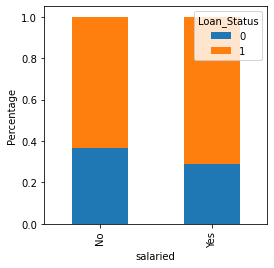

In [38]:
#Visual validation of hypothesis testing
salaried =pd.crosstab(df['salaried'],df['Loan_Status']) 
salaried.div(salaried.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.ylabel('Percentage')
plt.show()


In [39]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'EMI', 'BalanceIncome', 'salaried', 'TotalIncome_bin',
       'EMI_bin', 'BalanceIncome_bin'],
      dtype='object')

In [40]:
df.drop('TotalIncome_bin',axis=1,inplace=True)
df.drop('EMI_bin',axis=1,inplace=True)
df.drop('BalanceIncome_bin',axis=1,inplace=True)
df.drop('salaried',axis=1,inplace=True)
df.drop('Loan_ID',axis=1,inplace=True)
df.drop('Loan_Status',axis=1,inplace=True) #It is a target variable
df.drop('ApplicantIncome',axis=1,inplace=True) #As we already have total income now
df.drop('CoapplicantIncome',axis=1,inplace=True) #As we already have total income now

In [41]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'TotalIncome', 'EMI', 'BalanceIncome'],
      dtype='object')

In [42]:
df.drop(char,axis=1,inplace=True)

In [43]:
df.columns

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome',
       'EMI', 'BalanceIncome'],
      dtype='object')

## Encoding of categorical variables

In [44]:
char.drop(['Gender','Dependents','Self_Employed'],axis=1, inplace=True)

In [45]:
encoded_df = pd.get_dummies(char,drop_first=True)
encoded_df

,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,1
1,1,0,0,0
2,1,0,0,1
3,1,1,0,1
4,0,0,0,1
...,...,...,...,...
516,1,0,1,0
517,1,1,1,0
518,0,0,1,0
519,0,1,0,0


In [46]:
concat_encoded_df = pd.concat([df,encoded_df,Y],axis=1)
concat_encoded_df

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,EMI,BalanceIncome,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,250000,360.0,1.0,1316025.0,2011.556542,1.314013e+06,0,0,0,1,1
1,256000,360.0,1.0,1370475.0,2059.833899,1.368415e+06,1,0,0,0,0
2,132000,360.0,1.0,675000.0,1062.101854,6.739379e+05,1,0,0,1,1
3,240000,360.0,1.0,1111725.0,1931.094281,1.109794e+06,1,1,0,1,1
4,282000,360.0,1.0,1350000.0,2269.035780,1.347731e+06,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
516,226000,480.0,1.0,824175.0,1743.276979,8.224317e+05,1,0,1,0,1
517,246000,360.0,0.0,1096650.0,1979.371638,1.094671e+06,1,1,1,0,0
518,370000,360.0,1.0,1484550.0,2977.103683,1.481573e+06,0,0,1,0,0
519,190000,360.0,1.0,765000.0,1528.782972,7.634712e+05,0,1,0,0,0


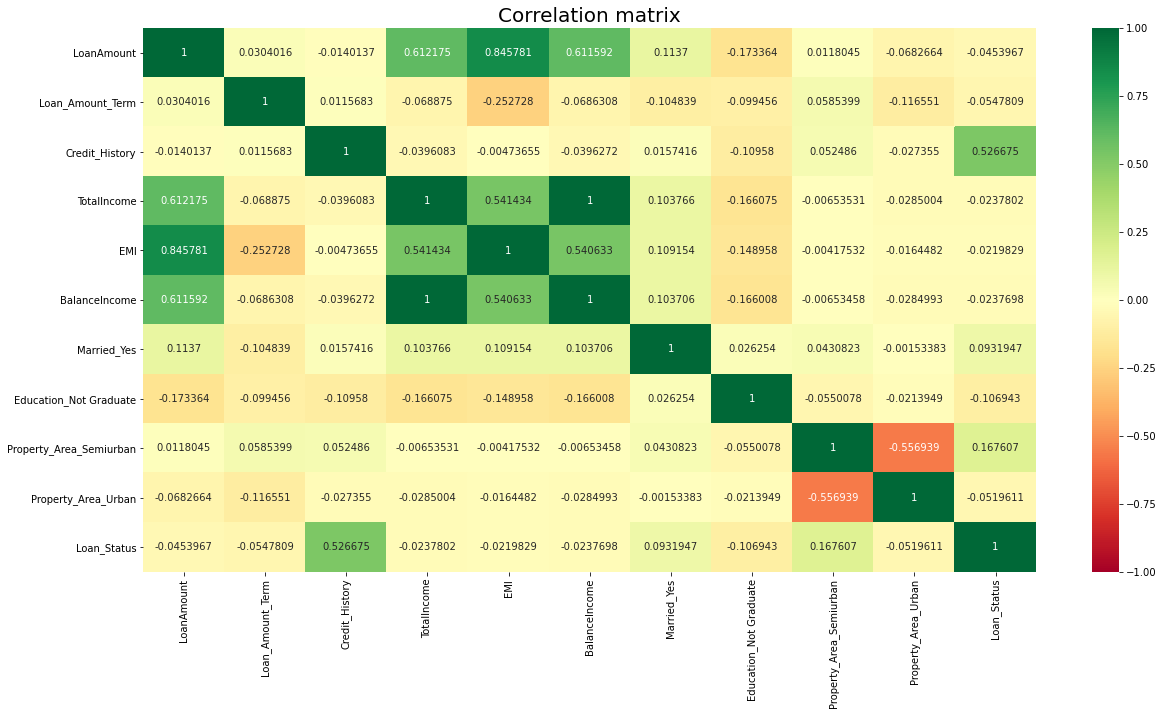

In [47]:
#Heatmap of correlation matrix
plt.figure(figsize=(20,10))
plt.title('Correlation matrix',fontsize=20)
sns.heatmap(concat_encoded_df.corr(),cmap='RdYlGn',annot=True,vmax=1.0,vmin=-1.0,fmt='g') #fmt creates scale appearing towards right
plt.show()

## Correlation matrix indicate +ve correlation exist between:
- Credit History and Loan Status
- Semiurban Property area and Loan Status

# Model building using different algos

In [48]:
#Build empty dataframe to capture metrics for easy comparison
df_metrics = pd.DataFrame(columns=['Model_Algo','Accuracy','AUC','f1_score','precision','recall'])

## Logistic Regression

In [49]:
Y = concat_encoded_df[['Loan_Status']]
X = concat_encoded_df.drop('Loan_Status',axis=1)

In [50]:
# Train test split in 80:20 ratio
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42) 

In [51]:
#Training the model
model_LR = LogisticRegression()
model_LR.fit(train_X, train_y)

LogisticRegression()

In [52]:
#Prediction on test data
pred_y = model_LR.predict(test_X)

In [53]:
#Confusion matrix
confusion_matrix(test_y,pred_y)

array([[ 0, 36],
       [ 0, 69]], dtype=int64)

In [54]:
#Accuracy
metrics.accuracy_score(test_y,pred_y)

0.6571428571428571

In [55]:
#AUC
auc = metrics.roc_auc_score(test_y,model_LR.predict_proba(test_X)[:,1]) #Predicted probability pertaining to Class 1.
auc

0.41264090177133655

In [56]:
print('f1_score:', f1_score(test_y,pred_y))
print('precision_score:',precision_score(test_y,pred_y))
print('recall:',recall_score(test_y,pred_y))

f1_score: 0.7931034482758621
precision_score: 0.6571428571428571
recall: 1.0


In [57]:
#Adding metrics into metrics DF
dict_1 = {'Model_Algo':'Logistic Regression','Accuracy':65.71,'AUC':0.41,'f1_score':0.79,'precision':0.66,'recall':1.0}
df_metrics=df_metrics.append(dict_1,ignore_index=True)

## Evaluation metrics of Logistic Regression
- Accuracy = 65.71%
- AUC = 0.41

## Applying regularization in Logistic Regression to improve performance

In [58]:
#regularization is penalty = 'l1' to improve performance metrics.
model_LR2 = LogisticRegression(penalty='l1',C=5,solver='liblinear',max_iter=1000) 

In [59]:
model_LR2.fit(train_X, train_y)

LogisticRegression(C=5, max_iter=1000, penalty='l1', solver='liblinear')

In [60]:
pred_y2 = model_LR2.predict(test_X)

In [61]:
metrics.accuracy_score(test_y,pred_y2)

0.819047619047619

In [62]:
auc = metrics.roc_auc_score(test_y,model_LR2.predict_proba(test_X)[:,1]) #Predicted probability pertaining to Class 1.
auc

0.8111916264090178

In [63]:
print(classification_report(test_y,pred_y2))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        36
           1       0.78      1.00      0.88        69

    accuracy                           0.82       105
   macro avg       0.89      0.74      0.76       105
weighted avg       0.86      0.82      0.80       105



In [64]:
print('f1_score:', f1_score(test_y,pred_y2))
print('precision_score:',precision_score(test_y,pred_y2))
print('recall:',recall_score(test_y,pred_y2))

f1_score: 0.8789808917197451
precision_score: 0.7840909090909091
recall: 1.0


In [65]:
dict_1 = {'Model_Algo':'Logistic Regression with Reg','Accuracy':82,'AUC':0.81,'f1_score':0.88,'precision':0.78,'recall':1.0}
df_metrics=df_metrics.append(dict_1,ignore_index=True)

## Evaluation metrics of Logistic Regression with Regularization
- Accuracy = 82.85%
- AUC = 0.81

## Support Vector Machine (SVM)

In [66]:
#Scale the data as we are using SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)

In [67]:
#Create support vector classifier, #rbf is default kernel value. C is punishing factor for errors.
model_svc = SVC(kernel='rbf',random_state=42,gamma=0.001,C=0.1,probability=True) 
model_svc.fit(X_train,train_y)

SVC(C=0.1, gamma=0.001, probability=True, random_state=42)

In [68]:
pred_y_svc = model_svc.predict(X_test)

In [69]:
confusion_matrix(test_y,pred_y_svc)

array([[ 0, 36],
       [ 0, 69]], dtype=int64)

In [70]:
metrics.accuracy_score(test_y,pred_y_svc)

0.6571428571428571

In [71]:
auc = metrics.roc_auc_score(test_y,model_svc.predict_proba(X_test)[:,1]) #Predicted probability pertaining to Class 1.
auc

0.751610305958132

In [72]:
print('f1_score:', f1_score(test_y,pred_y_svc))
print('precision_score:',precision_score(test_y,pred_y_svc))
print('recall:',recall_score(test_y,pred_y_svc))

f1_score: 0.7931034482758621
precision_score: 0.6571428571428571
recall: 1.0


In [73]:
dict_1 = {'Model_Algo':'SVM','Accuracy':66,'AUC':0.75,'f1_score':0.79,'precision':0.65,'recall':1.0}
df_metrics=df_metrics.append(dict_1,ignore_index=True)

## Evaluation metrics of SVM
- Accuracy = 65.71%
- AUC = 0.75

## Using GridSearchCV to find best param for SVM

In [74]:
from sklearn.model_selection import GridSearchCV
param = {'gamma':[0.001,.01, 0.1, 1, 1.5,2], 'C': [0.01,0.1,1,2,3]} #gamma determines shape of hyperplane, too high value means overfitting. C is regularization parameters so it punishes for error. kind of autobalance stuff.
modelCV = GridSearchCV(estimator=SVC(), param_grid=param, cv=10, scoring='roc_auc')
modelCV.fit(X_train,train_y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 2, 3],
                         'gamma': [0.001, 0.01, 0.1, 1, 1.5, 2]},
             scoring='roc_auc')

In [75]:
modelCV.best_score_

0.7600606290261462

In [76]:
modelCV.best_params_

{'C': 0.01, 'gamma': 0.01}

In [77]:
#Create support vector classifier
model_svc2 = SVC(kernel='rbf',random_state=42,gamma=0.01,C=0.01,probability=True) 
model_svc2.fit(X_train,train_y)

SVC(C=0.01, gamma=0.01, probability=True, random_state=42)

In [78]:
pred_y_svc2 = model_svc2.predict(X_test)

In [79]:
metrics.accuracy_score(test_y,pred_y_svc2)

0.6571428571428571

In [80]:
auc = metrics.roc_auc_score(test_y,model_svc2.predict_proba(X_test)[:,1]) #Predicted probability pertaining to Class 1.
auc

0.7721417069243156

In [81]:
print('f1_score:', f1_score(test_y,pred_y_svc2))
print('precision_score:',precision_score(test_y,pred_y_svc2))
print('recall:',recall_score(test_y,pred_y_svc2))

f1_score: 0.7931034482758621
precision_score: 0.6571428571428571
recall: 1.0


In [82]:
dict_1 = {'Model_Algo':'SVM with GridSearch','Accuracy':66,'AUC':0.77,'f1_score':0.79,'precision':0.65,'recall':1.0}
df_metrics=df_metrics.append(dict_1,ignore_index=True)

## Evaluation metrics of SVM after getting best param using GridSearchCV
- Accuracy = 65.71%
- AUC = 0.77

## K-Nearest Neighbours

In [83]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,train_y)

KNeighborsClassifier()

In [84]:
pred_y_knn = model_knn.predict(X_test)

In [85]:
metrics.accuracy_score(test_y,pred_y_knn)

0.7904761904761904

In [86]:
auc = metrics.roc_auc_score(test_y,model_knn.predict_proba(X_test)[:,1]) #Predicted probability pertaining to Class 1.
auc

0.7236312399355878

In [87]:
print('f1_score:', f1_score(test_y,pred_y_knn))
print('precision_score:',precision_score(test_y,pred_y_knn))
print('recall:',recall_score(test_y,pred_y_knn))

f1_score: 0.8571428571428571
precision_score: 0.7764705882352941
recall: 0.9565217391304348


In [88]:
dict_1 = {'Model_Algo':'KNN','Accuracy':79.04,'AUC':0.72,'f1_score':0.85,'precision':0.77,'recall':0.96}
df_metrics=df_metrics.append(dict_1,ignore_index=True)

## Evaluation metrics of KNN
- Accuracy = 79.04%
- AUC = 0.72

## Using GridSearchCV to find best param for KNN

In [89]:
params = [{'n_neighbors': range(3,10), 'metric':['euclidean','manhattan','chebyshev','canberra']}]
modelCV = GridSearchCV(KNeighborsClassifier(),params,cv=10,scoring='roc_auc')
modelCV.fit(X_train,train_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan', 'chebyshev',
                                     'canberra'],
                          'n_neighbors': range(3, 10)}],
             scoring='roc_auc')

In [90]:
modelCV.best_score_

0.7382120752810407

In [91]:
modelCV.best_params_

{'metric': 'manhattan', 'n_neighbors': 7}

In [92]:
model_knn2 = KNeighborsClassifier(n_neighbors=7,metric='manhattan')
model_knn2.fit(X_train,train_y)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [93]:
pred_y_knn2 = model_knn2.predict(X_test)

In [94]:
metrics.accuracy_score(test_y,pred_y_knn2)

0.8

In [95]:
auc = metrics.roc_auc_score(test_y,model_knn2.predict_proba(X_test)[:,1]) #Predicted probability pertaining to Class 1.
auc

0.7264492753623188

In [96]:
print('f1_score:', f1_score(test_y,pred_y_knn2))
print('precision_score:',precision_score(test_y,pred_y_knn2))
print('recall:',recall_score(test_y,pred_y_knn2))

f1_score: 0.8662420382165604
precision_score: 0.7727272727272727
recall: 0.9855072463768116


In [97]:
dict_1 = {'Model_Algo':'KNN with GridSearch','Accuracy':80,'AUC':0.73,'f1_score':0.87,'precision':0.77,'recall':0.98}
df_metrics=df_metrics.append(dict_1,ignore_index=True)

## Evaluation metrics of KNN after getting best param using GridSearchCV
- Accuracy = 80%
- AUC = 0.72

## Random Forest

In [98]:
model_RF = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
model_RF.fit(train_X,train_y)

RandomForestClassifier(max_depth=5, random_state=42)

In [99]:
pred_y_RF = model_RF.predict(test_X)

In [100]:
metrics.accuracy_score(test_y,pred_y_RF)

0.8

In [101]:
auc = metrics.roc_auc_score(test_y,model_RF.predict_proba(test_X)[:,1]) #Predicted probability pertaining to Class 1.
auc

0.8222624798711755

In [102]:
print('f1_score:', f1_score(test_y,pred_y_RF))
print('precision_score:',precision_score(test_y,pred_y_RF))
print('recall:',recall_score(test_y,pred_y_RF))

f1_score: 0.8645161290322582
precision_score: 0.7790697674418605
recall: 0.9710144927536232


In [103]:
dict_1 = {'Model_Algo':'RF','Accuracy':80,'AUC':0.82,'f1_score':0.86,'precision':0.77,'recall':0.97}
df_metrics=df_metrics.append(dict_1,ignore_index=True)

## Evaluation metrics of Random Forest 
- Accuracy = 80%
- AUC = 0.82

## Using GridSearchCV to find best param for Random Forest

In [104]:
param = [{'max_depth':[5,10,15], 'n_estimators': [50,100,150], 'max_features':['sqrt',0.2,0.3,0.5]}] 
model_RF2 = RandomForestClassifier(random_state=42)
modelCV = GridSearchCV(model_RF2, param, cv=10, scoring='roc_auc')
modelCV.fit(train_X,train_y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [5, 10, 15],
                          'max_features': ['sqrt', 0.2, 0.3, 0.5],
                          'n_estimators': [50, 100, 150]}],
             scoring='roc_auc')

In [105]:
modelCV.best_score_

0.7680418719211823

In [106]:
modelCV.best_params_

{'max_depth': 10, 'max_features': 0.2, 'n_estimators': 50}

In [107]:
model_RF2 = RandomForestClassifier(max_depth=10, n_estimators=50, max_features=0.2, random_state=42)
model_RF2.fit(train_X,train_y)

RandomForestClassifier(max_depth=10, max_features=0.2, n_estimators=50,
                       random_state=42)

In [108]:
pred_y_RF2 = model_RF2.predict(test_X)

In [109]:
metrics.accuracy_score(test_y,pred_y_RF2)

0.8095238095238095

In [110]:
auc = metrics.roc_auc_score(test_y,model_RF2.predict_proba(test_X)[:,1]) #Predicted probability pertaining to Class 1.
auc

0.7781803542673108

In [111]:
print('f1_score:', f1_score(test_y,pred_y_RF2))
print('precision_score:',precision_score(test_y,pred_y_RF2))
print('recall:',recall_score(test_y,pred_y_RF2))

f1_score: 0.8701298701298701
precision_score: 0.788235294117647
recall: 0.9710144927536232


In [112]:
dict_1 = {'Model_Algo':'RF with GridSearch','Accuracy':81,'AUC':0.78,'f1_score':0.87,'precision':0.79,'recall':0.97}
df_metrics=df_metrics.append(dict_1,ignore_index=True)

## Evaluation metrics of Random Forest after getting best param using GridSearchCV
- Accuracy = 81%
- AUC = 0.78

## Evaluation metrics : Comparison of different models

In [113]:
df_metrics.sort_values(by=['Accuracy','f1_score','precision','recall','AUC'], ascending=False)


,Model_Algo,Accuracy,AUC,f1_score,precision,recall
1,Logistic Regression with Reg,82.00,0.81,0.88,0.78,1.00
7,RF with GridSearch,81.00,0.78,0.87,0.79,0.97
5,KNN with GridSearch,80.00,0.73,0.87,0.77,0.98
6,RF,80.00,0.82,0.86,0.77,0.97
4,KNN,79.04,0.72,0.85,0.77,0.96
3,SVM with GridSearch,66.00,0.77,0.79,0.65,1.00
2,SVM,66.00,0.75,0.79,0.65,1.00
0,Logistic Regression,65.71,0.41,0.79,0.66,1.00


## Plotting AUC curve for different models

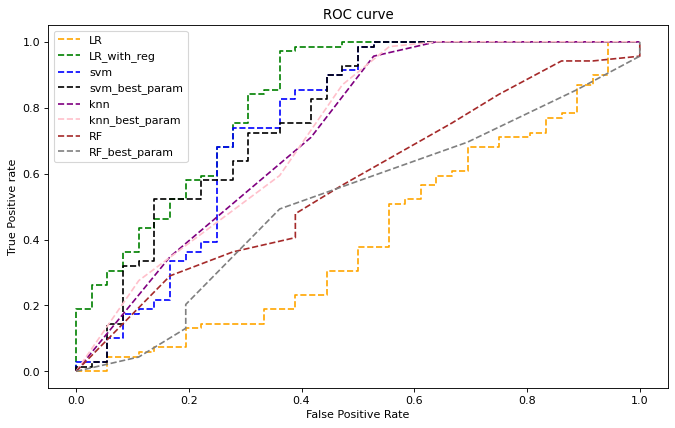

In [114]:
fpr1,tpr1,thresholds1 = metrics.roc_curve(test_y,model_LR.predict_proba(X_test)[:,1])
fpr2,tpr2,thresholds2 = metrics.roc_curve(test_y,model_LR2.predict_proba(X_test)[:,1])
fpr3,tpr3,thresholds3 = metrics.roc_curve(test_y,model_svc.predict_proba(X_test)[:,1])
fpr4,tpr4,thresholds4 = metrics.roc_curve(test_y,model_svc2.predict_proba(X_test)[:,1])
fpr5,tpr5,thresholds5 = metrics.roc_curve(test_y,model_knn.predict_proba(X_test)[:,1])
fpr6,tpr6,thresholds6 = metrics.roc_curve(test_y,model_knn2.predict_proba(X_test)[:,1])
fpr7,tpr7,thresholds7 = metrics.roc_curve(test_y,model_RF.predict_proba(X_test)[:,1])
fpr8,tpr8,thresholds8 = metrics.roc_curve(test_y,model_RF2.predict_proba(X_test)[:,1])

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LR')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='LR_with_reg')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='svm')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='svm_best_param')
plt.plot(fpr5, tpr5, linestyle='--',color='purple', label='knn')
plt.plot(fpr6, tpr6, linestyle='--',color='pink', label='knn_best_param')
plt.plot(fpr7, tpr7, linestyle='--',color='brown', label='RF')
plt.plot(fpr8, tpr8, linestyle='--',color='gray', label='RF_best_param')

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend()
plt.show();



# Based on the evaluation metrics, recommendation is to make use of:
- Logistic Regression with Regularization
- Random Forest with GridSearch

## Test Model with unseen data

In [115]:
## Test with the new data
df_test = pd.read_excel('consumer creditworthiness test data.xlsx')

In [116]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,788264,Male,No,0,Graduate,No,562500,0,110000,360,1.0,Semiurban
1,431937,Male,Yes,3+,Graduate,Yes,1277325,320400,200000,360,1.0,Rural
2,425437,Male,Yes,2,Graduate,Yes,1788300,1612350,960000,360,1.0,Rural
3,938101,Male,No,0,Graduate,No,1053000,469575,0,360,1.0,Semiurban
4,180559,Male,Yes,2,Graduate,Yes,3937500,0,800000,360,1.0,Rural


## Feature engineering on unseen data so that it can be feed to model for prediction

In [117]:
df_test.isna().sum().sort_values(ascending=False)

Credit_History       7
Self_Employed        5
Gender               3
Dependents           2
Loan_ID              0
Married              0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
dtype: int64

In [118]:
## Treat Null values
#Even though it is float type. It has only 2 values.
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0],inplace=True) 
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0],inplace=True)
#Mean value is a float value which cannot be true for Loan Term. If we check mode value, it is 360. 
#We can either use mode value to replace null values or median value as it is a float datatype.
df_test['Loan_Amount_Term'].fillna(np.nanmedian(df_test['Loan_Amount_Term']),inplace=True) 
#categorical feature. Using mode value to replace null values
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0],inplace=True)
df_test['Gender'].fillna(df_test['Gender'].mode()[0],inplace=True)
df_test['Married'].fillna(df_test['Married'].mode()[0],inplace=True)

In [119]:
df_test.isna().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [120]:
#Total income
df_test['TotalIncome'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['EMI'] = emi(df_test['LoanAmount'], 9,df_test['Loan_Amount_Term'] )
#Balance Income
df_test['BalanceIncome'] = df_test['TotalIncome'] - df_test['EMI']

In [121]:
df_test.drop('Loan_ID',axis=1,inplace=True)
df_test.drop('ApplicantIncome',axis=1,inplace=True) #As we already have total income now
df_test.drop('CoapplicantIncome',axis=1,inplace=True) #As we already have total income now

In [122]:
df_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'TotalIncome', 'EMI', 'BalanceIncome'],
      dtype='object')

In [123]:
char_test = df_test.select_dtypes(include='object')

In [124]:
char_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         93 non-null     object
 1   Married        93 non-null     object
 2   Dependents     93 non-null     object
 3   Education      93 non-null     object
 4   Self_Employed  93 non-null     object
 5   Property_Area  93 non-null     object
dtypes: object(6)
memory usage: 4.5+ KB


In [125]:
df_test.drop(char_test.columns,axis=1, inplace=True)
char_test.drop(['Gender','Dependents','Self_Employed'],axis=1, inplace=True)

In [126]:
encoded_df_test = pd.get_dummies(char_test,drop_first=True)
encoded_df_test

,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
88,0,0,0,0
89,1,0,0,0
90,1,0,0,1
91,1,0,0,1


In [127]:
concat_encoded_df_test = pd.concat([df_test,encoded_df_test],axis=1)
concat_encoded_df_test

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,EMI,BalanceIncome,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,110000,360,1.0,562500,885.084879,5.616149e+05,0,0,1,0
1,200000,360,1.0,1597725,1609.245234,1.596116e+06,1,0,0,0
2,960000,360,1.0,3400650,7724.377123,3.392926e+06,1,0,0,0
3,0,360,1.0,1522575,0.000000,1.522575e+06,0,0,1,0
4,800000,360,1.0,3937500,6436.980936,3.931063e+06,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
88,142000,360,1.0,652500,1142.564116,6.513574e+05,0,0,0,0
89,80000,180,1.0,923850,811.413267,9.230386e+05,1,0,0,0
90,506000,360,1.0,1870200,4071.390442,1.866129e+06,1,0,0,1
91,374000,360,1.0,1706175,3009.288587,1.703166e+06,1,0,0,1


## Pedicting Loan Status using Logistic Regression with regularization

In [128]:
pred_y3 = model_LR2.predict(concat_encoded_df_test)

In [129]:
pred_y3

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0])

In [132]:
d = build_df(pred_y3)
d.to_excel('Logistic_Reg_with_regularization.xlsx', index=False)

## Pedicting Loan Status using Random Forest with Gridsearch

In [133]:
pred_y4 = model_RF2.predict(concat_encoded_df_test)
d = build_df(pred_y4)
d.to_excel('Random_Forest_with_GridSearch.xlsx',index=False)